In [309]:
pip install scikit-learn

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [311]:
pd.set_option('display.max_columns', None)

In [352]:
# Carregando os dados
df = pd.read_csv('teste_indicium_precificacao.csv')
print("Dados carregados com sucesso! Exibindo as primeiras linhas:")
display(df.head(3))

Dados carregados com sucesso! Exibindo as primeiras linhas:


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [353]:
# Verificando dimensões do dataset
print(f"Dimensões do dataset: {df.shape}")

Dimensões do dataset: (48894, 16)


In [354]:
# Removendo colunas irrelevantes para análise
drop_columns = ['id', 'nome', 'host_id', 'host_name']
df.drop(columns=drop_columns, inplace=True)
print(f"Colunas removidas: {drop_columns}")

Colunas removidas: ['id', 'nome', 'host_id', 'host_name']


In [316]:
df.head(3)

,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194


In [355]:
# Verificando valores ausentes
display(df.isna().sum())

,0
bairro_group,0
bairro,0
latitude,0
longitude,0
room_type,0
price,0
minimo_noites,0
numero_de_reviews,0
ultima_review,10052
reviews_por_mes,10052


In [356]:
# Removendo colunas com muitos valores ausentes
drop_na_columns = ['ultima_review', 'reviews_por_mes']
df.drop(columns=drop_na_columns, inplace=True)
print(f"Colunas removidas por muitos valores ausentes: {drop_na_columns}")

display(df.head(3))

Colunas removidas por muitos valores ausentes: ['ultima_review', 'reviews_por_mes']


,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
1,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
2,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194


In [357]:
# Análise exploratória: Média de preço por bairro_group
df_grouped_bg = df[['bairro_group', 'price']].groupby('bairro_group').agg('mean').sort_values(by='price', ascending=False)
df_grouped_bg.reset_index(inplace=True)
display(df_grouped_bg)

,bairro_group,price
0,Manhattan,196.875814
1,Brooklyn,124.381983
2,Staten Island,114.812332
3,Queens,99.517649
4,Bronx,87.496792


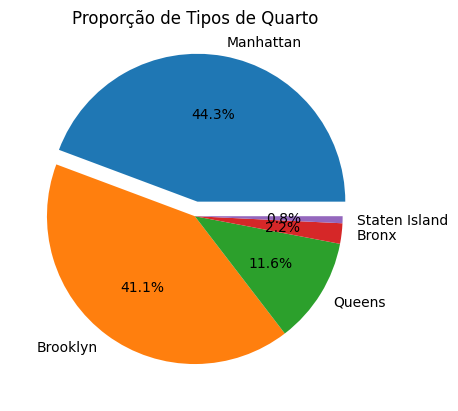

In [359]:
# Contagem de bairros
qtde_hosts = df['bairro_group'].value_counts()

# Gráfico de pizza com destaque para o maior grupo
explode_values = [0.1 if bairro == qtde_hosts.idxmax() else 0 for bairro in qtde_hosts.index]
plt.pie(qtde_hosts, labels=qtde_hosts.index, explode=explode_values, autopct='%1.1f%%')
plt.title('Proporção de Tipos de Quarto')
plt.show()

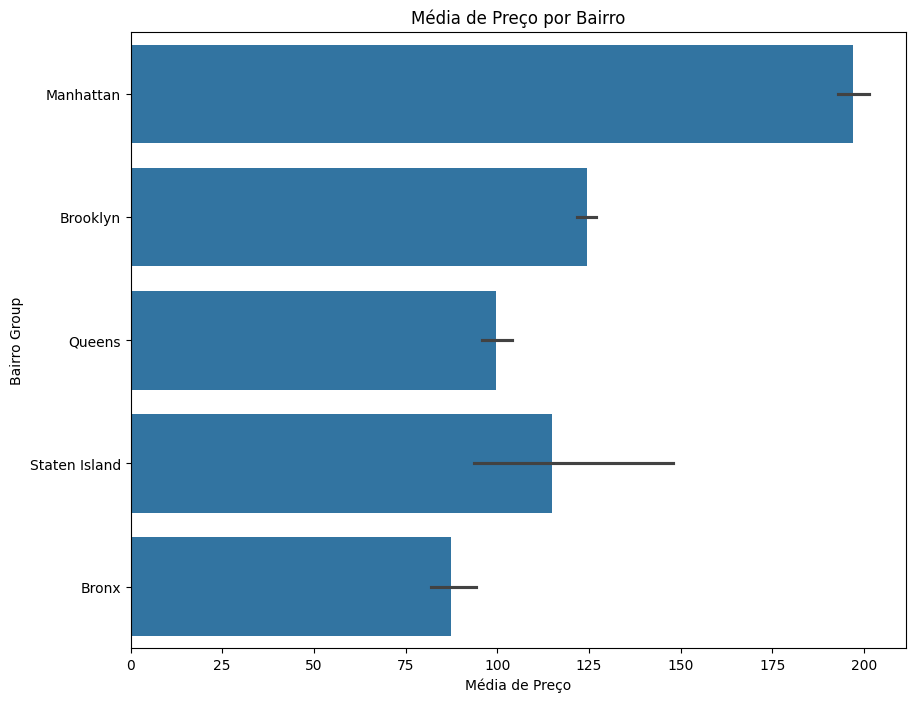

In [363]:
# Gráfico de barras para média de preço por bairro
plt.figure(figsize=(10,8))
sns.barplot(data=df, y='bairro_group', x='price')
plt.title('Média de Preço por Bairro')
plt.xlabel('Média de Preço')
plt.ylabel('Bairro Group')
plt.show()

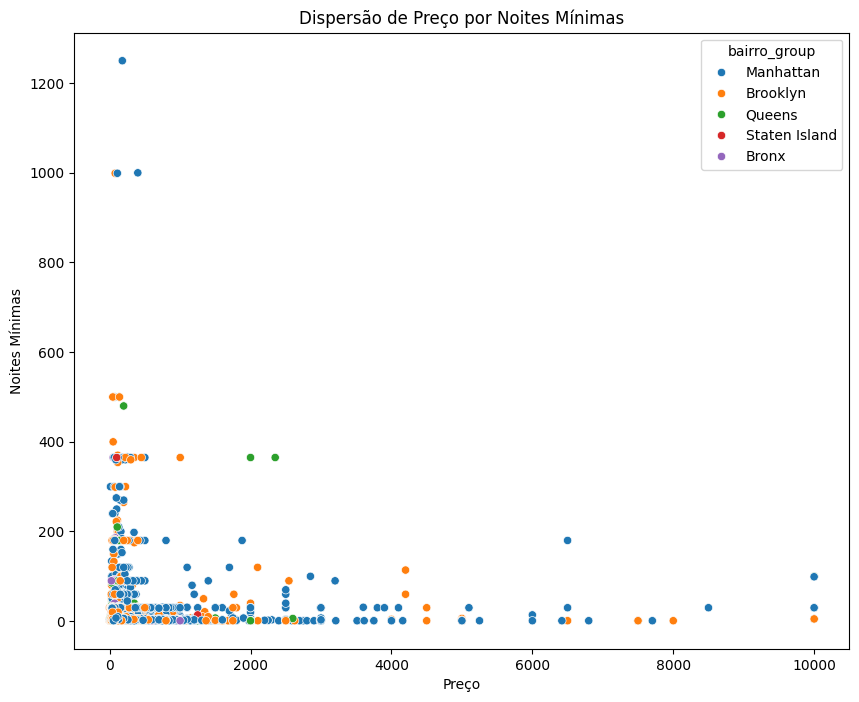

In [367]:
# Gráfico de dispersão aprimorado
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='price', y='minimo_noites', hue='bairro_group')
plt.title('Dispersão de Preço por Noites Mínimas')
plt.xlabel('Preço')
plt.ylabel('Noites Mínimas')
plt.show()

In [369]:
# Análise exploratória: Média de preço por room_type
df_grouped_rt = df[['room_type', 'price']].groupby('room_type').agg('mean').sort_values(by='price', ascending=False)
df_grouped_rt.reset_index(inplace=True)
display(df_grouped_rt)

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.778320
2,Shared room,70.127586


In [374]:
# Análise exploratória: Média de preço por room_type
df_grouped_rt = df[['room_type', 'price']].groupby('room_type').agg('mean').sort_values(by='price', ascending=False)
df_grouped_rt.reset_index(inplace=True)
display(df_grouped_rt)

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.778320
2,Shared room,70.127586


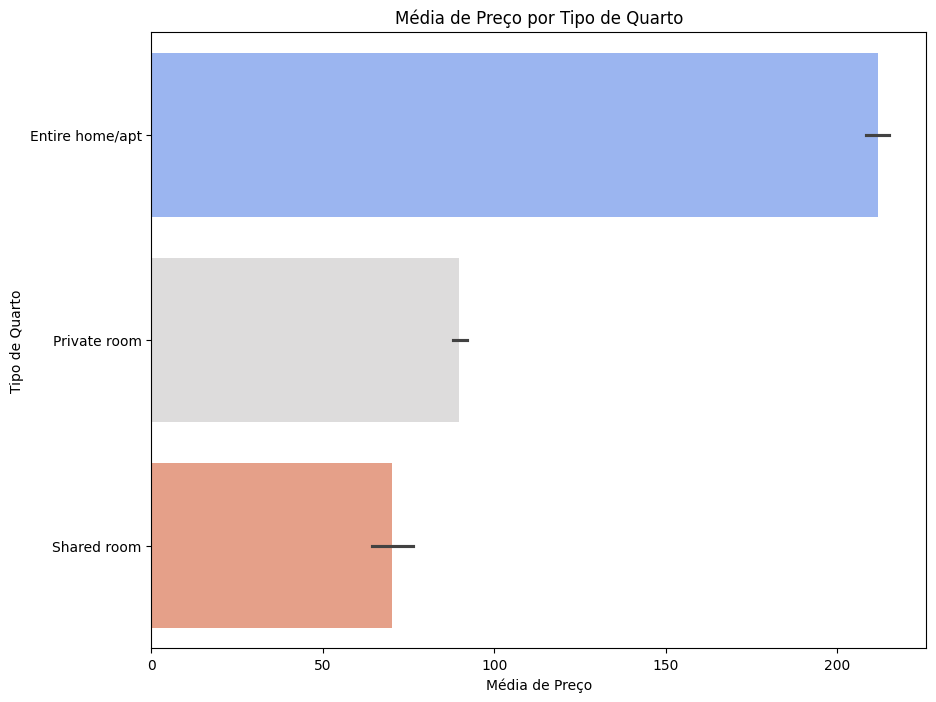

In [375]:
# Gráfico de barras para média de preço por tipo de quarto
plt.figure(figsize=(10,8))
sns.barplot(data=df, y='room_type', x='price', palette='coolwarm')
plt.title('Média de Preço por Tipo de Quarto')
plt.xlabel('Média de Preço')
plt.ylabel('Tipo de Quarto')
plt.show()

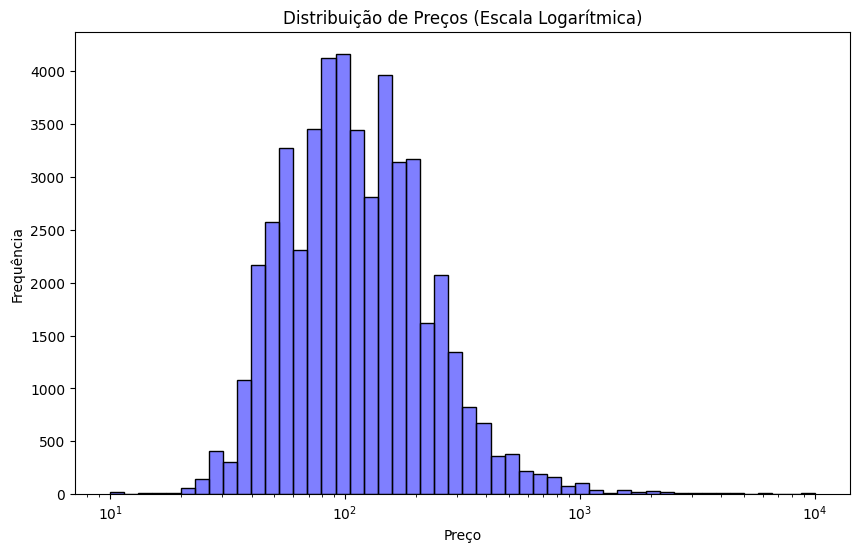

In [376]:
# Histograma de preços com escala logarítmica
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, log_scale=True, color='blue')
plt.title('Distribuição de Preços (Escala Logarítmica)')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

In [384]:
# Selecionando colunas com tipos de dados numéricos
df_numerico = df.select_dtypes(include=[float, int])

In [383]:
# Calculando a matriz de correlação
correlation_matrix = df_numerico.corr()

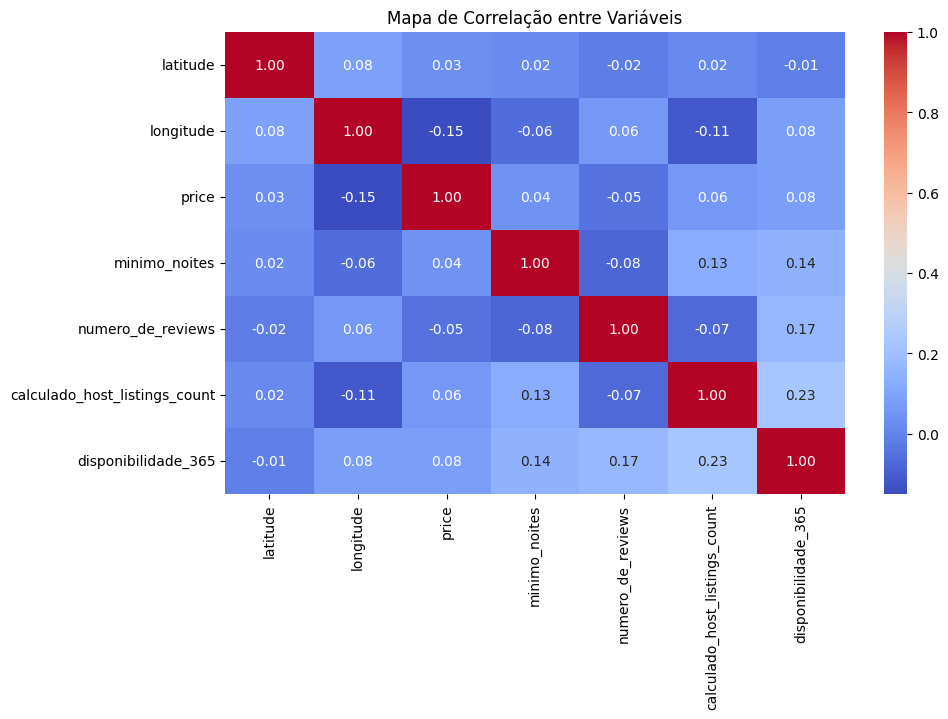

In [381]:
# Correlação entre variáveis numéricas
plt.figure(figsize=(10,6))
sns.heatmap(df_numerico.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação entre Variáveis')
plt.show()

In [385]:
# Removendo outliers da variável 'price' usando IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
df = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]
print("Outliers removidos com sucesso!")
print(f"Dimensões do dataset após remoção de outliers: {df.shape}")

Outliers removidos com sucesso!
Dimensões do dataset após remoção de outliers: (45922, 10)


In [386]:
# Normalização da variável 'price'
df['price_normalized'] = scaler.fit_transform(df[['price']])
print("Variável 'price' normalizada com sucesso!")

# Transformação One-Hot Encoding para variáveis categóricas
categorical_features = ['bairro_group', 'room_type']
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
df_encoded = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_features]), columns=one_hot_encoder.get_feature_names_out())
df = pd.concat([df, df_encoded], axis=1)
df.drop(columns=categorical_features, inplace=True)
print("Codificação one-hot realizada com sucesso!")

# Exibição do dataset final
display(df.head())

Variável 'price' normalizada com sucesso!
Codificação one-hot realizada com sucesso!


,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,price_normalized,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island,room_type_Private room,room_type_Shared room
0,Midtown,40.75362,-73.98377,225.0,1.0,45.0,2.0,355.0,0.673653,0.0,1.0,0.0,0.0,0.0,0.0
1,Harlem,40.80902,-73.94190,150.0,3.0,0.0,1.0,365.0,0.449102,0.0,1.0,0.0,0.0,1.0,0.0
2,Clinton Hill,40.68514,-73.95976,89.0,1.0,270.0,1.0,194.0,0.266467,1.0,0.0,0.0,0.0,0.0,0.0
3,East Harlem,40.79851,-73.94399,80.0,10.0,9.0,1.0,0.0,0.239521,0.0,1.0,0.0,0.0,0.0,0.0
4,Murray Hill,40.74767,-73.97500,200.0,3.0,74.0,1.0,129.0,0.598802,0.0,1.0,0.0,0.0,0.0,0.0


In [387]:
# Separação dos dados em treino e teste
X = df.drop(columns=['price', 'price_normalized'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Dimensões do conjunto de treino: {X_train.shape}, {y_train.shape}")
print(f"Dimensões do conjunto de teste: {X_test.shape}, {y_test.shape}")

Dimensões do conjunto de treino: (38860, 13), (38860,)
Dimensões do conjunto de teste: (9716, 13), (9716,)


In [394]:
# Construindo pipeline para regressão linear
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])
